In [4]:
import json

# Load the 'history' file
with open('history', 'r') as file:
	history = [json.loads(line) for line in file if line.strip()]

In [46]:
from datetime import datetime
from collections import defaultdict
from matplotlib import pyplot as plt
from itertools import groupby

def parse_datetime(datetime_str):
		# 2025-03-23T17:02:56+0300 -> 2025-03-23T17:02:56+03:00
		datetime_str_fixed = datetime_str[:22] + ':' + datetime_str[22:]
		return datetime.fromisoformat(datetime_str_fixed)

def find_by_id(id):
	return next((item for item in history if item['id'] == id), None)

def plot_price_by_date(history):
	# Group data by car ID and prepare data for plotting
	car_data = defaultdict(list)

	for record in history:
		car_id = record['id']
		price = record['price']['usd']['amount']
		date = parse_datetime(record['downloadDate'])
		car_data[car_id].append((date, price))

	# Plot the data
	plt.figure(figsize=(12, 16))

	for car_id, data in car_data.items():
		data.sort(key=lambda x: x[0])  # Sort by date
		dates, prices = zip(*data)
		plt.plot(dates, prices, marker='o', linestyle='-')
		plt.text(dates[-1], prices[-1], f'id: {car_id}', fontsize=9, ha='left', va='center')

	plt.title('Car Price Dependence on Download Date by Car ID')
	plt.xlabel('Download Date')
	plt.ylabel('Price')
	plt.xticks(rotation=45)
	plt.grid(True)
	plt.tight_layout()
	plt.show()

def find_insights(history):
	insights = []
	grouped_history = {key: list(group) for key, group in groupby(history, key=lambda x: x['downloadDate'])}
	dates = sorted(grouped_history.keys())
	date_pairs = list(zip(dates, dates[1:]))
	for date1, date2 in date_pairs:
		ids1 = {item['id'] for item in grouped_history[date1]}
		ids2 = {item['id'] for item in grouped_history[date2]}
		ids_added = ids2 - ids1
		ids_removed = ids1 - ids2
		price_up = {}
		price_down = {}
		for car_id in ids1 & ids2:
			price1 = next(item['price']['usd']['amount'] for item in grouped_history[date1] if item['id'] == car_id)
			price2 = next(item['price']['usd']['amount'] for item in grouped_history[date2] if item['id'] == car_id)
			if price2 - price1 > 0:
				price_up[car_id] = price2 - price1
			if price2 - price1 < 0:
				price_down[car_id] = price2 - price1
		insight = {
			'date1': date1,
			'date2': date2,
			'ids_added': list(ids_added),
			'ids_removed': list(ids_removed),
			'price_up': price_up,
			'price_down': price_down
		}
		insights.append(insight)

	return insights

def show_insights(insights, n_last=3):
	for insight in insights[-n_last:]:
		print(f"{insight['date1']} -> {insight['date2']}")
		if insight['ids_added']:
			print(f"\t🆕: {insight['ids_added']}")
		if insight['ids_removed']:
			print(f"\t❌: {insight['ids_removed']}")
		if insight['price_up']:
			print(f"\t📈: {insight['price_up']}")
		if insight['price_down']:
			print(f"\t📉: {insight['price_down']}")

## BMW F34 Insights

In [31]:
bmw_history = list(filter(lambda x: x['model'] == 'BMW F34', history))

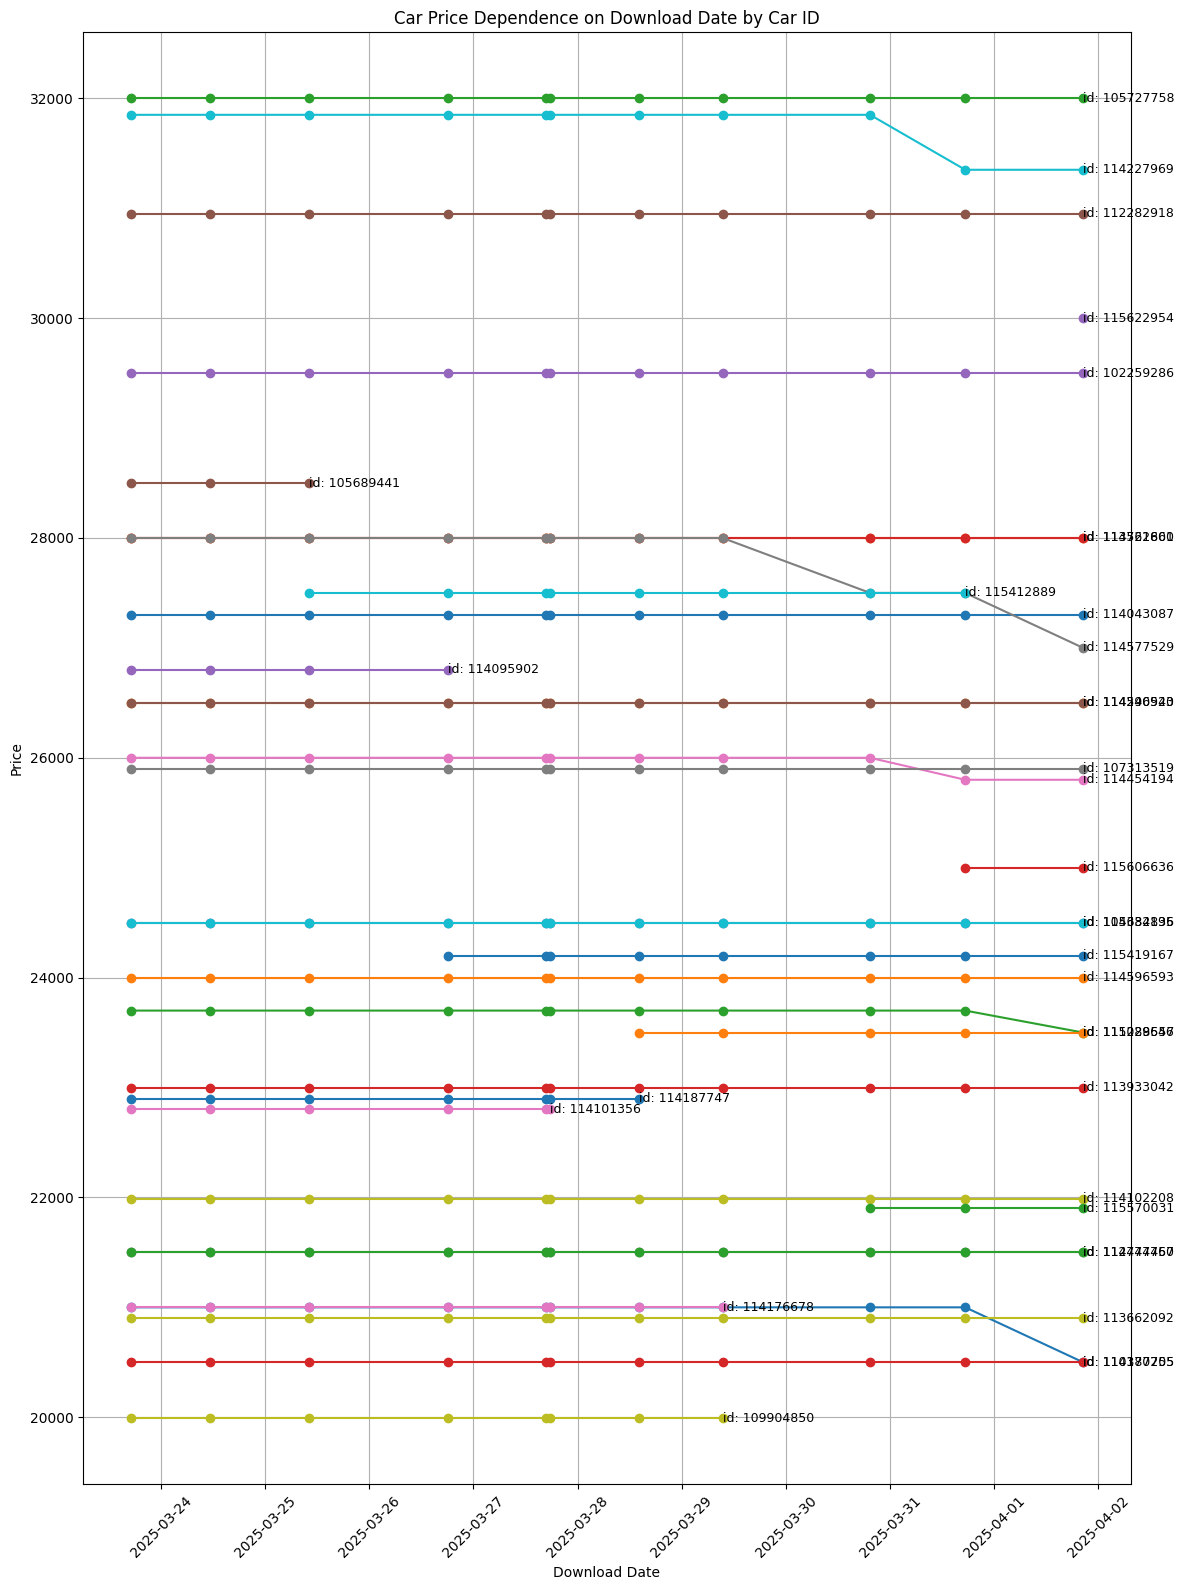

In [32]:
plot_price_by_date(bmw_history)

In [47]:
bmw_insights = find_insights(bmw_history)
show_insights(bmw_insights)

2025-03-29T09:25:02+0300 -> 2025-03-30T19:24:09+0300
	🆕: [115570031]
	❌: [109904850, 114176678]
	📉: {114577529: -500}
2025-03-30T19:24:09+0300 -> 2025-03-31T17:19:26+0300
	🆕: [115606636]
	📉: {114227969: -500, 114454194: -200}
2025-03-31T17:19:26+0300 -> 2025-04-01T20:29:35+0300
	🆕: [115622954]
	❌: [115412889]
	📉: {110387255: -500, 115288557: -200, 114577529: -500}


## AUDI A4 B6

In [48]:
audi_history = list(filter(lambda x: x['model'] == 'AUDI A4 B6', history))

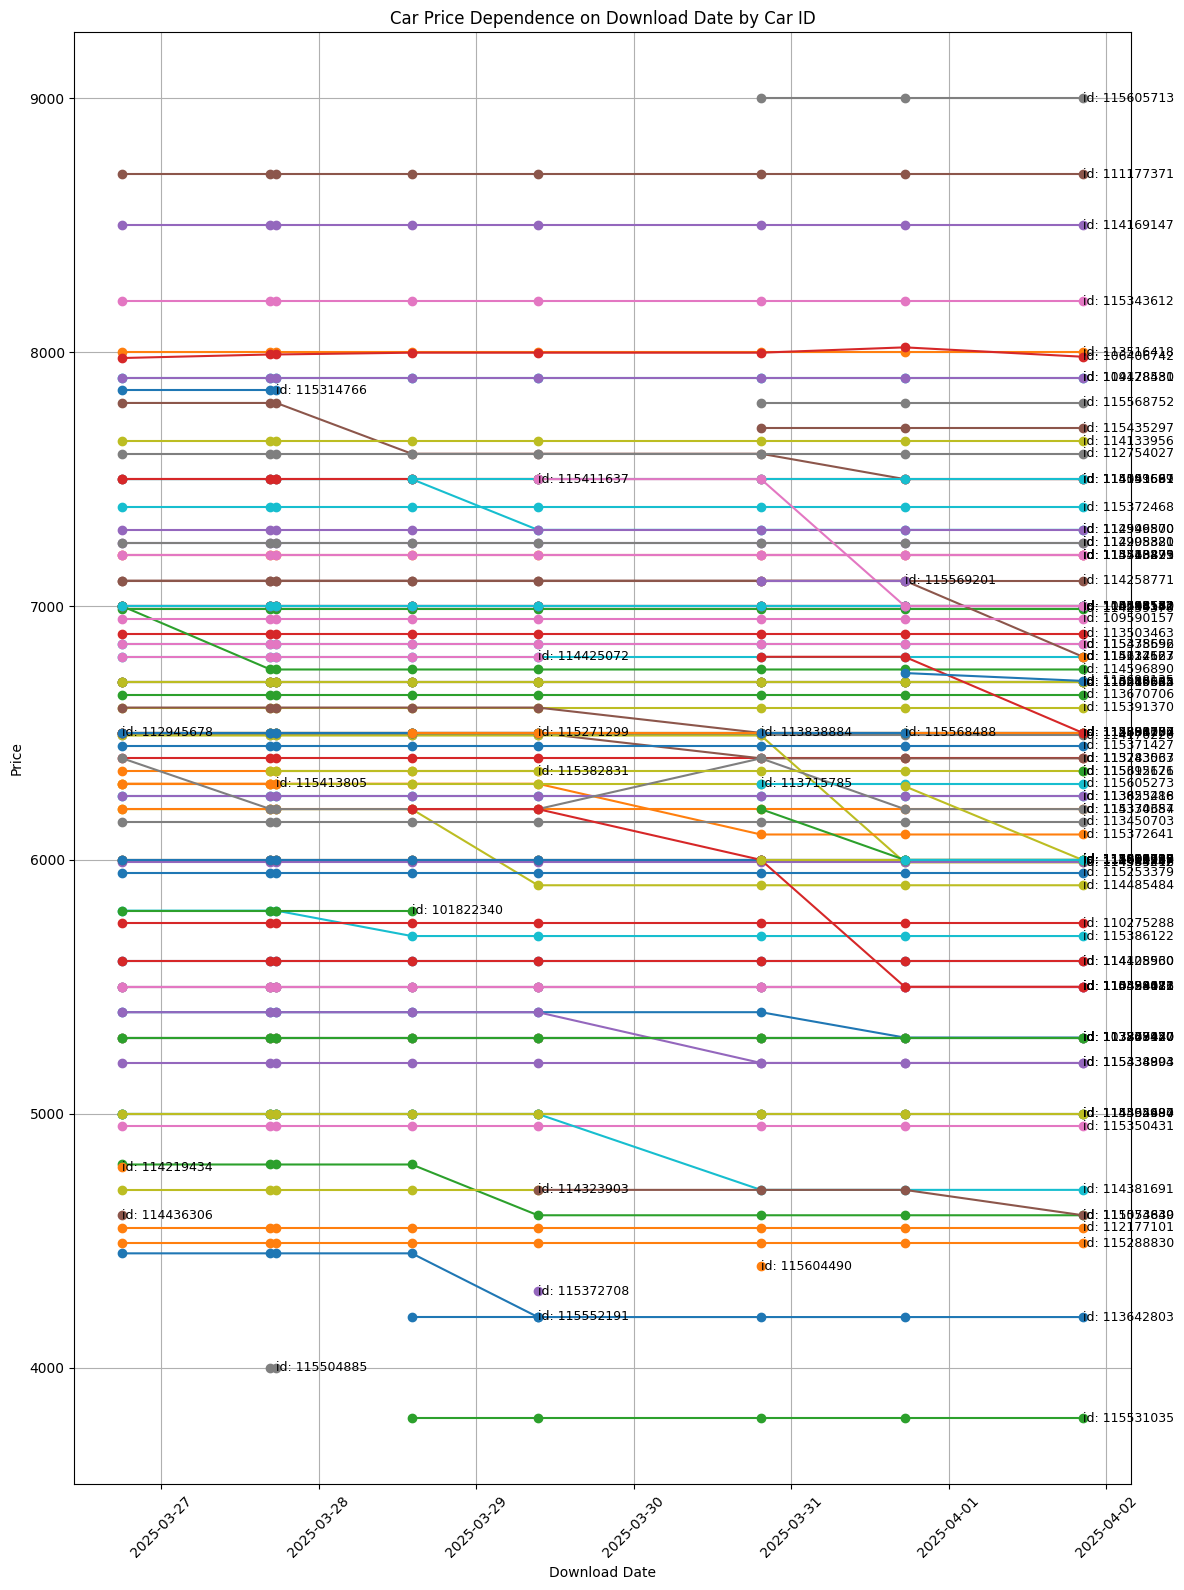

In [49]:
plot_price_by_date(audi_history)

In [50]:
audi_insights = find_insights(audi_history)
show_insights(audi_insights)

2025-03-29T09:25:02+0300 -> 2025-03-30T19:24:09+0300
	🆕: [115435297, 115604196, 115604007, 115568488, 115604490, 115568752, 115569201, 115605713, 115604919, 115605273, 115568893]
	❌: [115271299, 115372708, 114323903, 115382831, 114425072, 115411637, 115552191]
	📈: {114334387: 200}
	📉: {115283537: -100, 115372641: -200, 115288287: -100, 114381691: -299, 115529621: -200, 115434994: -200}
2025-03-30T19:24:09+0300 -> 2025-03-31T17:19:26+0300
	🆕: [115613937, 115426397, 113698135]
	❌: [113715785, 115604490, 113838884]
	📈: {106406742: 21}
	📉: {114199687: -100, 114334387: -200, 115604196: -200, 115554532: -500, 114585416: -500, 115529621: -500, 113267170: -100}
2025-03-31T17:19:26+0300 -> 2025-04-01T20:29:35+0300
	🆕: [115612171, 113720829, 115614527]
	❌: [115568488, 115569201]
	📉: {115604007: -300, 115613937: -291, 115132663: -300, 115554630: -100, 106406742: -37, 113698135: -31}
